In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

%matplotlib inline

In [34]:
N_voltages  = 2000
step_size   = 1e-10
time        = step_size*np.arange(1,N_voltages)*1e9

data        = {target_electrode : pd.read_csv(f"data/Nx=7_Ny=7_Nz=1_Ne=8_{target_electrode}.csv") for target_electrode in range(1,8)}
voltages    = data[1]['E0'].values

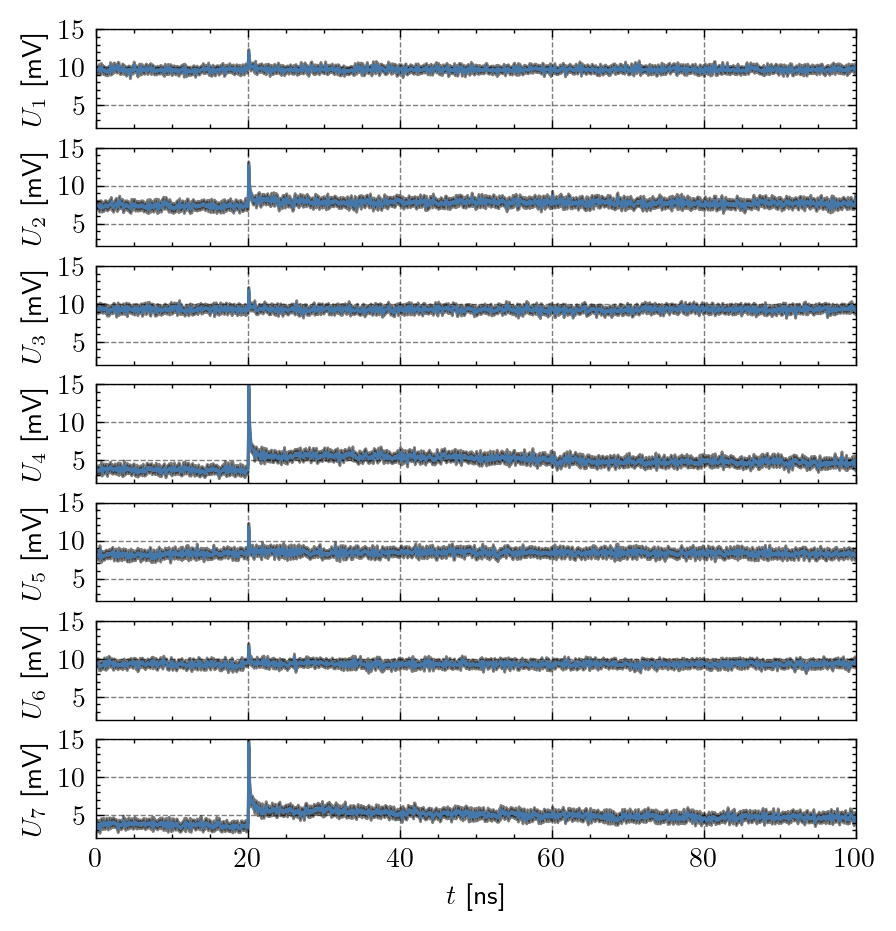

In [51]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    fig.set_figheight(fig.get_figheight()*2.0)

    for i, df in data.items():

        ax      = fig.add_subplot(7,1,i)
        values  = df['Current']*1000
        error   = df['Error']*1000

        ax.plot(time, values)#, label='$N_{NP} ='+f' {N}$')
        ax.fill_between(x=time, y1=values-error, y2=values+error, color='black', alpha=0.5)
        ax.set_ylabel(f"$U_{i}$ [mV]")
        ax.set_ylim(2,15)
        ax.set_xlim(0,100)
        
        if i != 7:
            ax.set_xticklabels("")

    ax.set_xlabel("$t$ [ns]")

    # fig.savefig("plots/constant_string_low_T.svg", transparent=True)